# Impelementing Braking system using Fuzzy Logic

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
distance = np.arange(0, 50, 1)
speed = np.arange(0, 100, 1)
Brake_F = np.arange(0, 100, 1)

distance = ctrl.Antecedent(distance, 'distance')
speed = ctrl.Antecedent(speed, 'speed')
Brake_F = ctrl.Consequent(Brake_F,'Brake_F')

## Fuzzification

In [3]:
# Fuzzification
distance_VC = fuzz.trimf(distance.universe, [0, 0, 10])
distance_C = fuzz.trimf(distance.universe, [5, 15, 25])
distance_F = fuzz.trimf(distance.universe, [20, 30, 40])
distance_VF = fuzz.trimf(distance.universe, [35, 50, 50])

distance['very_close'] = distance_VC
distance['close'] = distance_C
distance['far'] = distance_F
distance['very_far'] = distance_VF

speed_VS = fuzz.trapmf(speed.universe, [0, 0, 20, 30])
speed_S = fuzz.trapmf(speed.universe, [20, 30, 45, 55])
speed_F = fuzz.trapmf(speed.universe, [45, 55, 70, 80])
speed_VF = fuzz.trapmf(speed.universe, [70, 80, 100,100])

speed['very_slow'] = speed_VS
speed['slow'] = speed_S
speed['fast'] = speed_F
speed['very_fast'] = speed_VF

Brake_F_VL = fuzz.trimf(Brake_F.universe, [0, 20, 40])
Brake_F_L = fuzz.trimf(Brake_F.universe, [20, 40, 60])
Brake_F_H = fuzz.trimf(Brake_F.universe, [40, 60, 80])
Brake_F_VH = fuzz.trimf(Brake_F.universe, [60, 100, 100])

Brake_F['very_low'] = Brake_F_VL
Brake_F['low'] = Brake_F_L
Brake_F['high'] = Brake_F_H
Brake_F['very_high'] = Brake_F_VH

## Plot Fuzzy Memberships

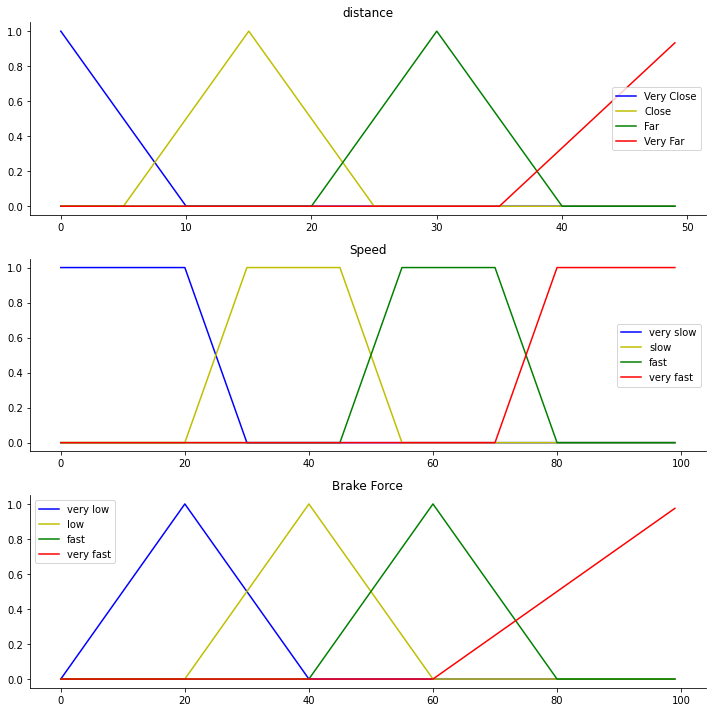

In [4]:
# ploting
fig, (ax0 , ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 10))

ax0.plot(distance.universe, distance_VC, 'b', linewidth=1.5, label='Very Close')
ax0.plot(distance.universe, distance_C, 'y', linewidth=1.5, label='Close')
ax0.plot(distance.universe, distance_F, 'g', linewidth=1.5, label='Far')
ax0.plot(distance.universe, distance_VF, 'r', linewidth=1.5, label='Very Far')
ax0.set_title('distance')
ax0.legend()

ax1.plot(speed.universe, speed_VS, 'b', linewidth=1.5, label='very slow')
ax1.plot(speed.universe, speed_S, 'y', linewidth=1.5, label='slow')
ax1.plot(speed.universe, speed_F, 'g', linewidth=1.5, label='fast')
ax1.plot(speed.universe, speed_VF, 'r', linewidth=1.5, label='very fast')
ax1.set_title('Speed')
ax1.legend()

ax2.plot(Brake_F.universe, Brake_F_VL, 'b', linewidth=1.5, label='very low')
ax2.plot(Brake_F.universe, Brake_F_L, 'y', linewidth=1.5, label='low')
ax2.plot(Brake_F.universe, Brake_F_H, 'g', linewidth=1.5, label='fast')
ax2.plot(Brake_F.universe, Brake_F_VH, 'r', linewidth=1.5, label='very fast')
ax2.set_title('Brake Force')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

## Defining Rules

In [5]:
# define rules
rule1 = ctrl.Rule(distance['very_close'] & speed['very_slow'] , Brake_F['high'])
rule2 = ctrl.Rule(distance['very_close'] & speed['slow'] , Brake_F['very_high'])
rule3 = ctrl.Rule(distance['very_close'] & speed['fast'] , Brake_F['very_high'])
rule4 = ctrl.Rule(distance['very_close'] & speed['very_fast'] , Brake_F['very_high'])

rule5 = ctrl.Rule(distance['close'] & speed['very_slow'] , Brake_F['low'])
rule6 = ctrl.Rule(distance['close'] & speed['slow'] , Brake_F['low'])
rule7 = ctrl.Rule(distance['close'] & speed['fast'] , Brake_F['high'])
rule8 = ctrl.Rule(distance['close'] & speed['very_fast'] , Brake_F['very_high'])

rule9 = ctrl.Rule(distance['far'] & speed['very_slow'] , Brake_F['very_low'])
rule10 = ctrl.Rule(distance['far'] & speed['slow'] , Brake_F['low'])
rule11 = ctrl.Rule(distance['far'] & speed['fast'] , Brake_F['low'])
rule12 = ctrl.Rule(distance['far'] & speed['very_fast'] , Brake_F['high'])

rule13 = ctrl.Rule(distance['very_far'] & speed['very_slow'] , Brake_F['very_low'])
rule14 = ctrl.Rule(distance['very_far'] & speed['slow'] , Brake_F['very_low'])
rule15 = ctrl.Rule(distance['very_far'] & speed['fast'] , Brake_F['low'])
rule16 = ctrl.Rule(distance['very_far'] & speed['very_fast'] , Brake_F['low'])

brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16])
braking = ctrl.ControlSystemSimulation(brake_ctrl)


## Test

In [23]:
while True:

        s = int(input("Enter speed (0-100 km/h) : "))
        d = int(input("Enter distance (m) : "))

        print("speed: ", s)
        print("distance: ", d)

        if (s/2 <= d):
                print ("No brake")
        else:
                braking.input['speed'] = s
                braking.input['distance'] = d
        
                braking.compute()

                print ("Brake Force(%): ", braking.output['Brake_F'])
                print ("Decrease speed to: ", s-(s*braking.output['Brake_F'] / 100))

speed:  50
distance:  20
Brake Force(%):  50.00000000000002
Decrease speed to:  24.99999999999999
speed:  50
distance:  8
Brake Force(%):  57.919934640522875
Decrease speed to:  21.04003267973856
speed:  50
distance:  2
Brake Force(%):  83.92528735632185
Decrease speed to:  8.037356321839077
speed:  90
distance:  20
Brake Force(%):  83.92528735632185
Decrease speed to:  14.467241379310337
speed:  50
distance:  35
No brake
speed:  90
distance:  35
Brake Force(%):  60.0
Decrease speed to:  36.0


ValueError: invalid literal for int() with base 10: ''